In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
stats_df = pd.read_pickle("ablation_result_df.pkl")

In [3]:
stats_df

,function,dimension,study,obj_lists,min_found_lists,avg_min_found,std_min_found
0,ackley,50,boxhigh,"[[21.253238677978516, 21.253238677978516, 21.2...","[[21.253238677978516, 21.253238677978516, 21.2...","[21.219270324707033, 21.219270324707033, 21.21...","[0.05813916062527396, 0.05813916062527396, 0.0..."
1,ackley,50,boxlow,"[[21.340312957763672, 21.340312957763672, 21.3...","[[21.340312957763672, 21.340312957763672, 21.3...","[21.35849609375, 21.35849609375, 21.3584960937...","[0.13442748777655683, 0.13442748777655683, 0.1..."
2,ackley,50,exphigh,"[[21.444210052490234, 21.444210052490234, 21.4...","[[21.444210052490234, 21.444210052490234, 21.4...","[21.25697479248047, 21.25697479248047, 21.2569...","[0.21413986810752586, 0.21413986810752586, 0.2..."
3,ackley,50,explow,"[[21.39307403564453, 21.39307403564453, 21.393...","[[21.39307403564453, 21.39307403564453, 21.393...","[21.277609252929686, 21.277609252929686, 21.27...","[0.1986563006285194, 0.1986563006285194, 0.198..."
4,ackley,50,lbhigh,"[[21.319332122802734, 21.319332122802734, 21.3...","[[21.319332122802734, 21.319332122802734, 21.3...","[21.202345275878905, 21.202345275878905, 21.20...","[0.19453338790692074, 0.19453338790692074, 0.1..."
5,ackley,50,lblow,"[[21.17459487915039, 21.17459487915039, 21.174...","[[21.17459487915039, 21.17459487915039, 21.174...","[21.208272552490236, 21.208272552490236, 21.20...","[0.15277253720062095, 0.15277253720062095, 0.1..."
6,ackley,50,local-opt,"[[21.515838623046875, 21.25113296508789, 21.25...","[[21.515838623046875, 21.25113296508789, 21.25...","[21.28687629699707, 21.20069999694824, 21.2000...","[0.16089645616233283, 0.15890722237908333, 0.1..."
7,ackley,50,no-learning,"[[21.0770263671875, 21.0770263671875, 21.07702...","[[21.0770263671875, 21.0770263671875, 21.07702...","[21.272610473632813, 21.272610473632813, 21.27...","[0.14408538028808102, 0.14408538028808102, 0.1..."
8,ackley,50,no-local-opt,"[[21.523216247558594, 21.523216247558594, 21.3...","[[21.523216247558594, 21.523216247558594, 21.3...","[21.316805267333983, 21.316805267333983, 21.14...","[0.12612812069851692, 0.12612812069851692, 0.2..."
9,ackley,50,nodeexphigh,"[[21.21166229248047, 21.21166229248047, 21.211...","[[21.21166229248047, 21.21166229248047, 21.211...","[21.114319610595704, 21.114319610595704, 21.11...","[0.08534272563178558, 0.08534272563178558, 0.0..."


In [4]:
def plot(stats_df, 
         function,
         studies, 
         xlim=None, 
         ylim=None, 
         log_x=False, 
         log_y=False, 
         exclude_algos=[], 
         figsize=(6, 4),
         dpi=300,
         legend=False,
         save_dir=None,
         label_change_dict={},
        ):
    
    plot_df = stats_df[stats_df['function'] == function]
    
    fig = plt.figure(figsize=figsize, dpi=dpi)
    plt.locator_params(axis='x', nbins=5)
    plt.locator_params(axis='y', nbins=5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
#     for row_idx in range(len(plot_df)):
    for study in studies:
        df_row = plot_df[plot_df["study"] == study]
        assert len(df_row) == 1
        df_row = df_row.iloc[0]
#         algorithm = df_row['algorithm']
#         if algorithm not in line_style_dict:
#             continue
#         if algorithm in exclude_algos:
#             continue
            
#         style_dict = line_style_dict[algorithm]
        
#         all_results = df_row['min_found_lists']
#         label = "{}_{}_{}".format(df_row['algorithm'], df_row['function'], df_row['dimension'])
#         label = df_row['algorithm'].replace("_", " ").replace("mcir", "MCIR (ours)")
        label = df_row['study']
        if label in label_change_dict:
            label = label_change_dict[label]
        
        means = df_row['avg_min_found']
        err = df_row['std_min_found']
        
        if xlim is not None and xlim[1] is not None:
            means = means[:xlim[1]]
            err = err[:xlim[1]]

        plt.plot([i for i in range(len(means))], means, label=label, 
#                 color=style_dict['color'], linewidth=style_dict['linewidth'], 
                 rasterized=True)
        plt.fill_between([i for i in range(len(means))], means - err / 2, means + err / 2, 
                        alpha=0.2, 
#                          color=style_dict['color'], 
                         rasterized=True)
        
        if legend:
            plt.legend(fontsize=12)
        
        xlabel = '# samples'
        ylabel = 'f(x)'
        
        if log_x:
            plt.xscale('log')
            xlabel += ' (log scale)'
        if log_y:
            plt.yscale('log')
            ylabel += ' (log scale)'
            
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        
    
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    plt.gcf().subplots_adjust(bottom=0.15, left=0.15)

    if save_dir:
        dst = os.path.join(save_dir, "ablation_{}_{}.pdf".format(function, "-".join(studies)))
        fig.savefig(
            dst, 
            dpi=dpi, 
            format='pdf',
        )
        
    plt.show()
    

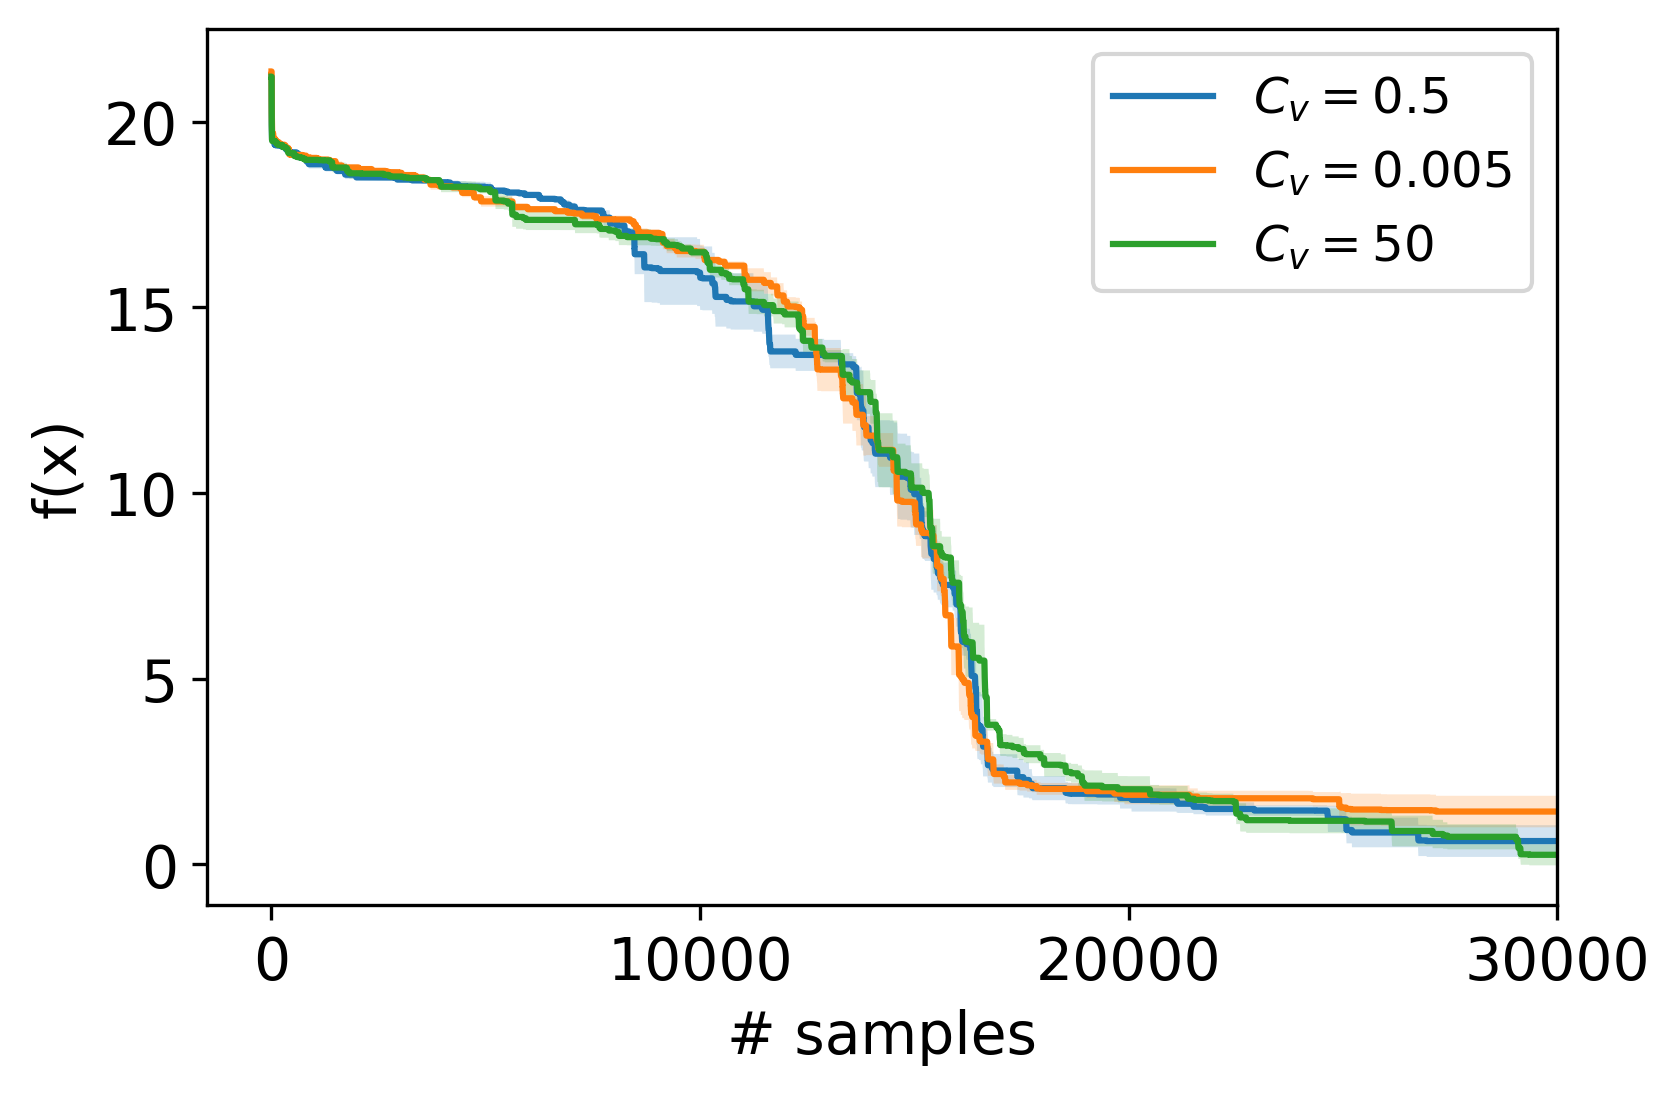

In [5]:
# plot(stats_df, 'ackley', ['original', 'boxlow', 'boxhigh'], 
#      xlim=[None, 30000], ylim=[None, None], legend=True, save_dir="/projects/mcmm/figures/")

label_change_dict = {
    "original":    r"$C_{v} = 0.5$",
    "boxlow":       r"$C_{v} = 0.005$",
    "boxhigh":      r"$C_{v} = 50$",
}
plot(stats_df, 'ackley', ['original', 'boxlow', 'boxhigh'], 
     xlim=[None, 30000], ylim=[None, None], legend=True, save_dir="/projects/mcmm/figures/",
    label_change_dict=label_change_dict)

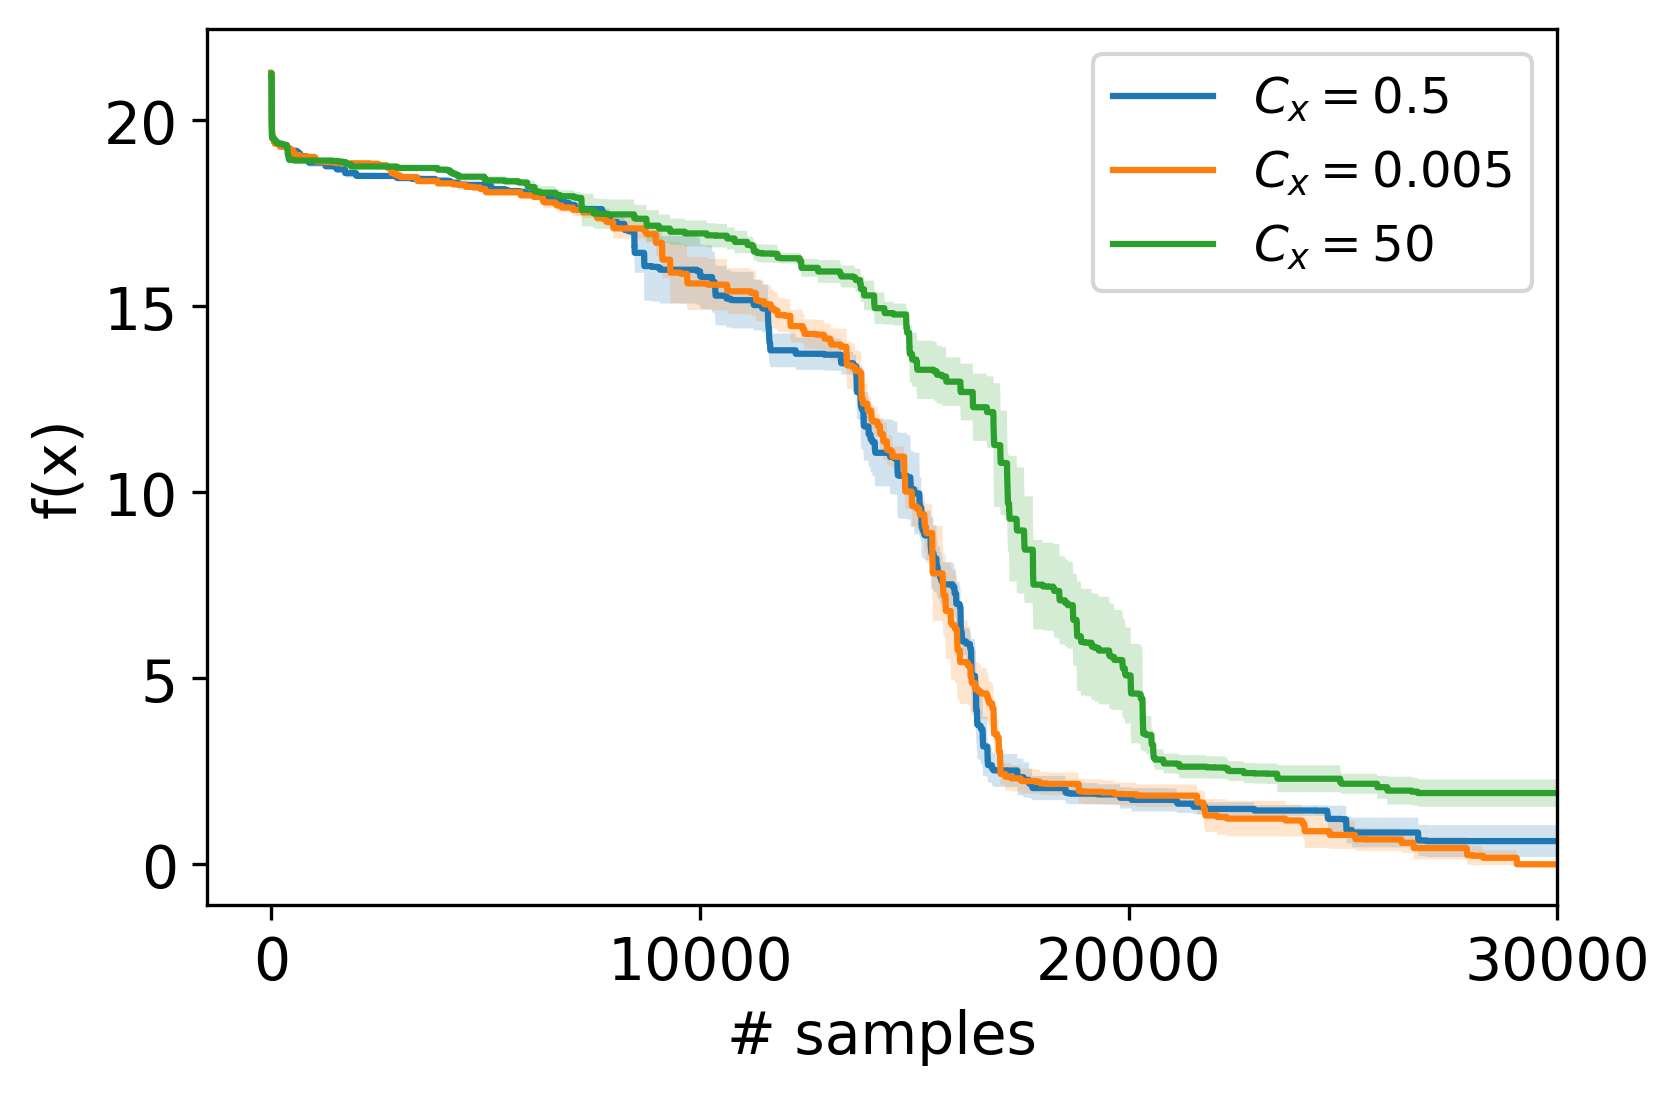

In [6]:
# plot(stats_df, 'ackley', ['original', 'explow', 'exphigh'], 
#      xlim=[None, 30000], ylim=[None, None], legend=True, save_dir="/projects/mcmm/figures/")

label_change_dict = {
    "original":     r"$C_{x} = 0.5$",
    "explow":       r"$C_{x} = 0.005$",
    "exphigh":      r"$C_{x} = 50$",
}
plot(stats_df, 'ackley', ['original', 'explow', 'exphigh'], 
     xlim=[None, 30000], ylim=[None, None], legend=True, save_dir="/projects/mcmm/figures/",
    label_change_dict=label_change_dict)

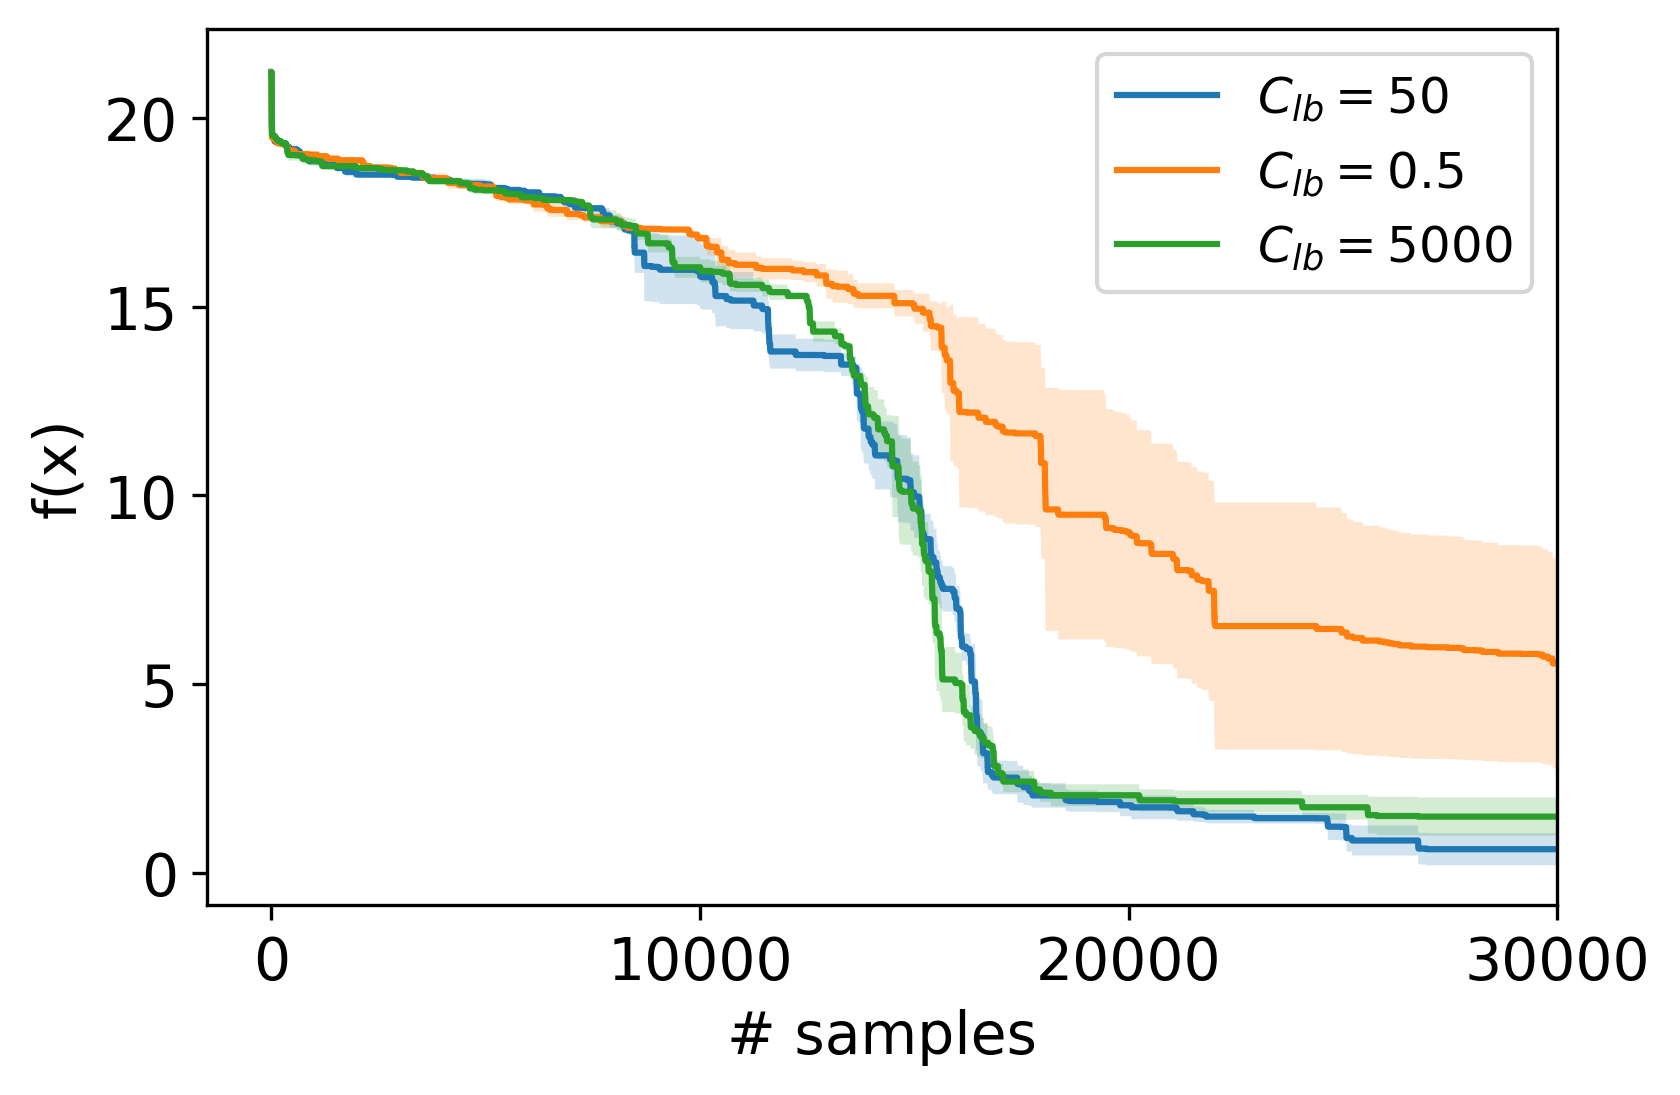

In [7]:
# plot(stats_df, 'ackley', ['original', 'lblow', 'lbhigh'], 
#      xlim=[None, 30000], ylim=[None, None], legend=True, save_dir="/projects/mcmm/figures/")

label_change_dict = {
    "original":    r"$C_{lb} = 50$",
    "lblow":       r"$C_{lb} = 0.5$",
    "lbhigh":      r"$C_{lb} = 5000$",
}
plot(stats_df, 'ackley', ['original', 'lblow', 'lbhigh'], 
     xlim=[None, 30000], ylim=[None, None], legend=True, save_dir="/projects/mcmm/figures/",
    label_change_dict=label_change_dict)

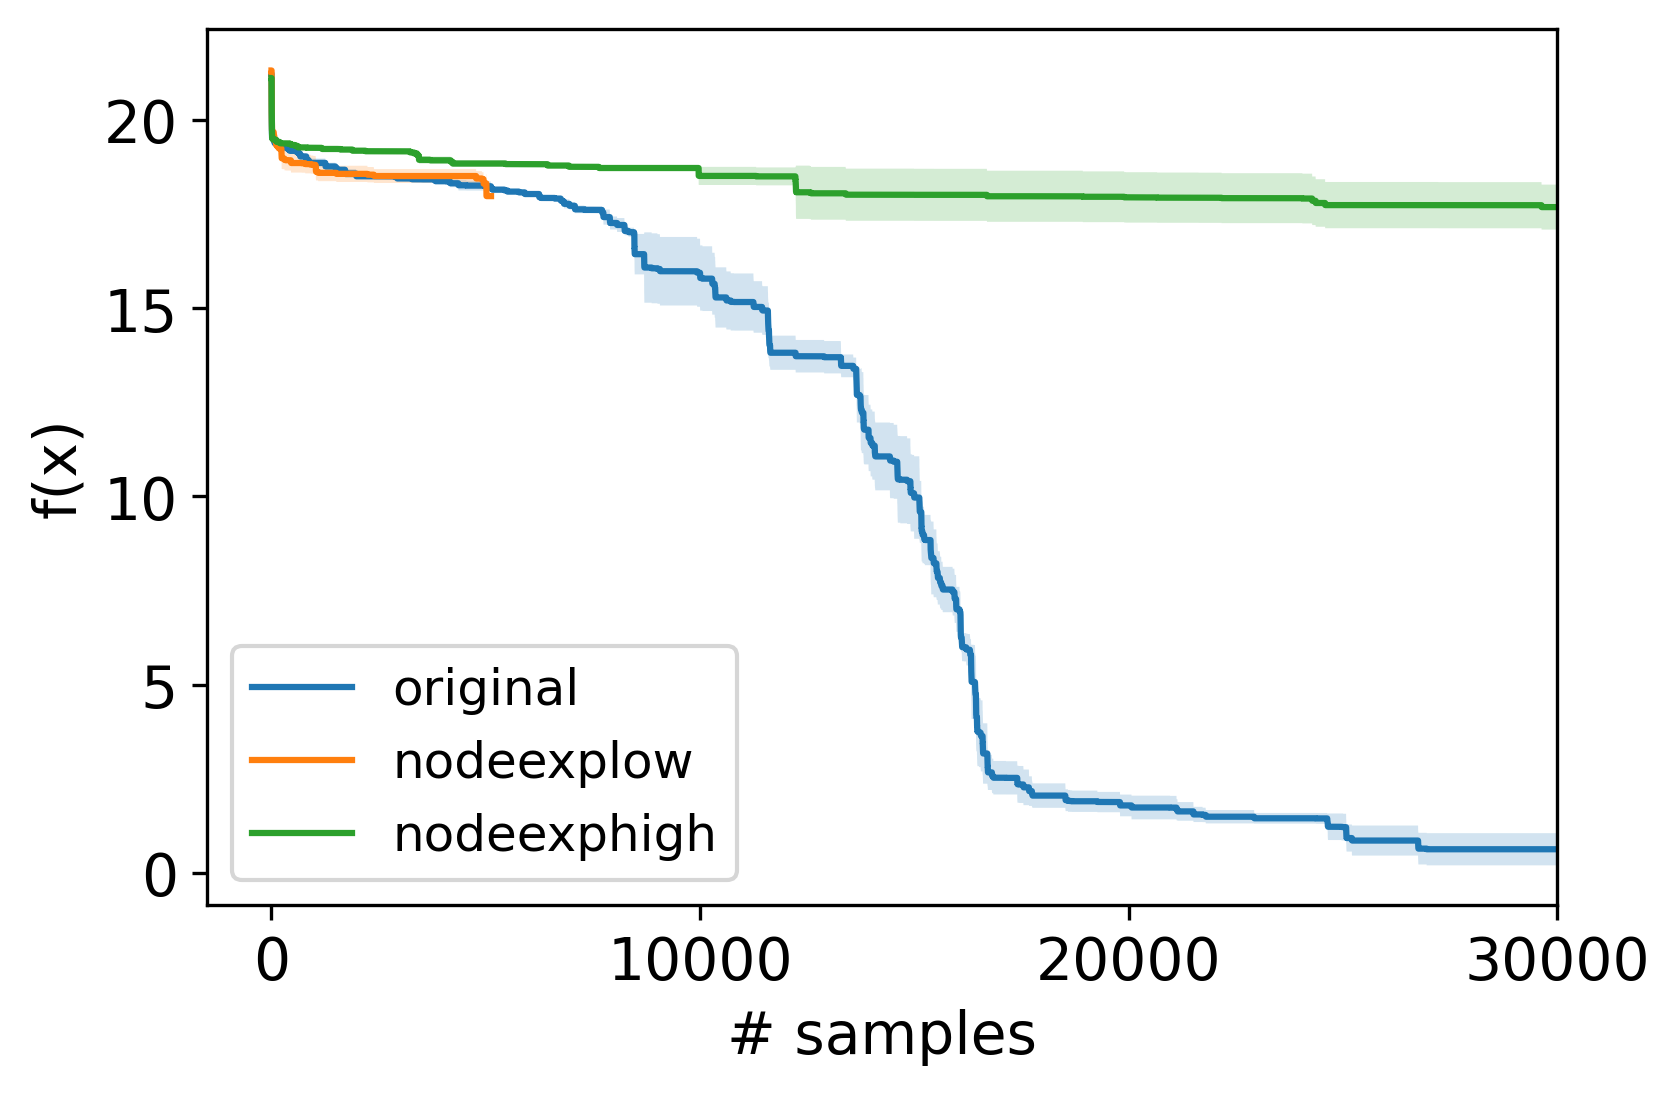

In [8]:
plot(stats_df, 'ackley', ['original', 'nodeexplow', 'nodeexphigh'], 
     xlim=[None, 30000], ylim=[None, None], legend=True, save_dir="/projects/mcmm/figures/")

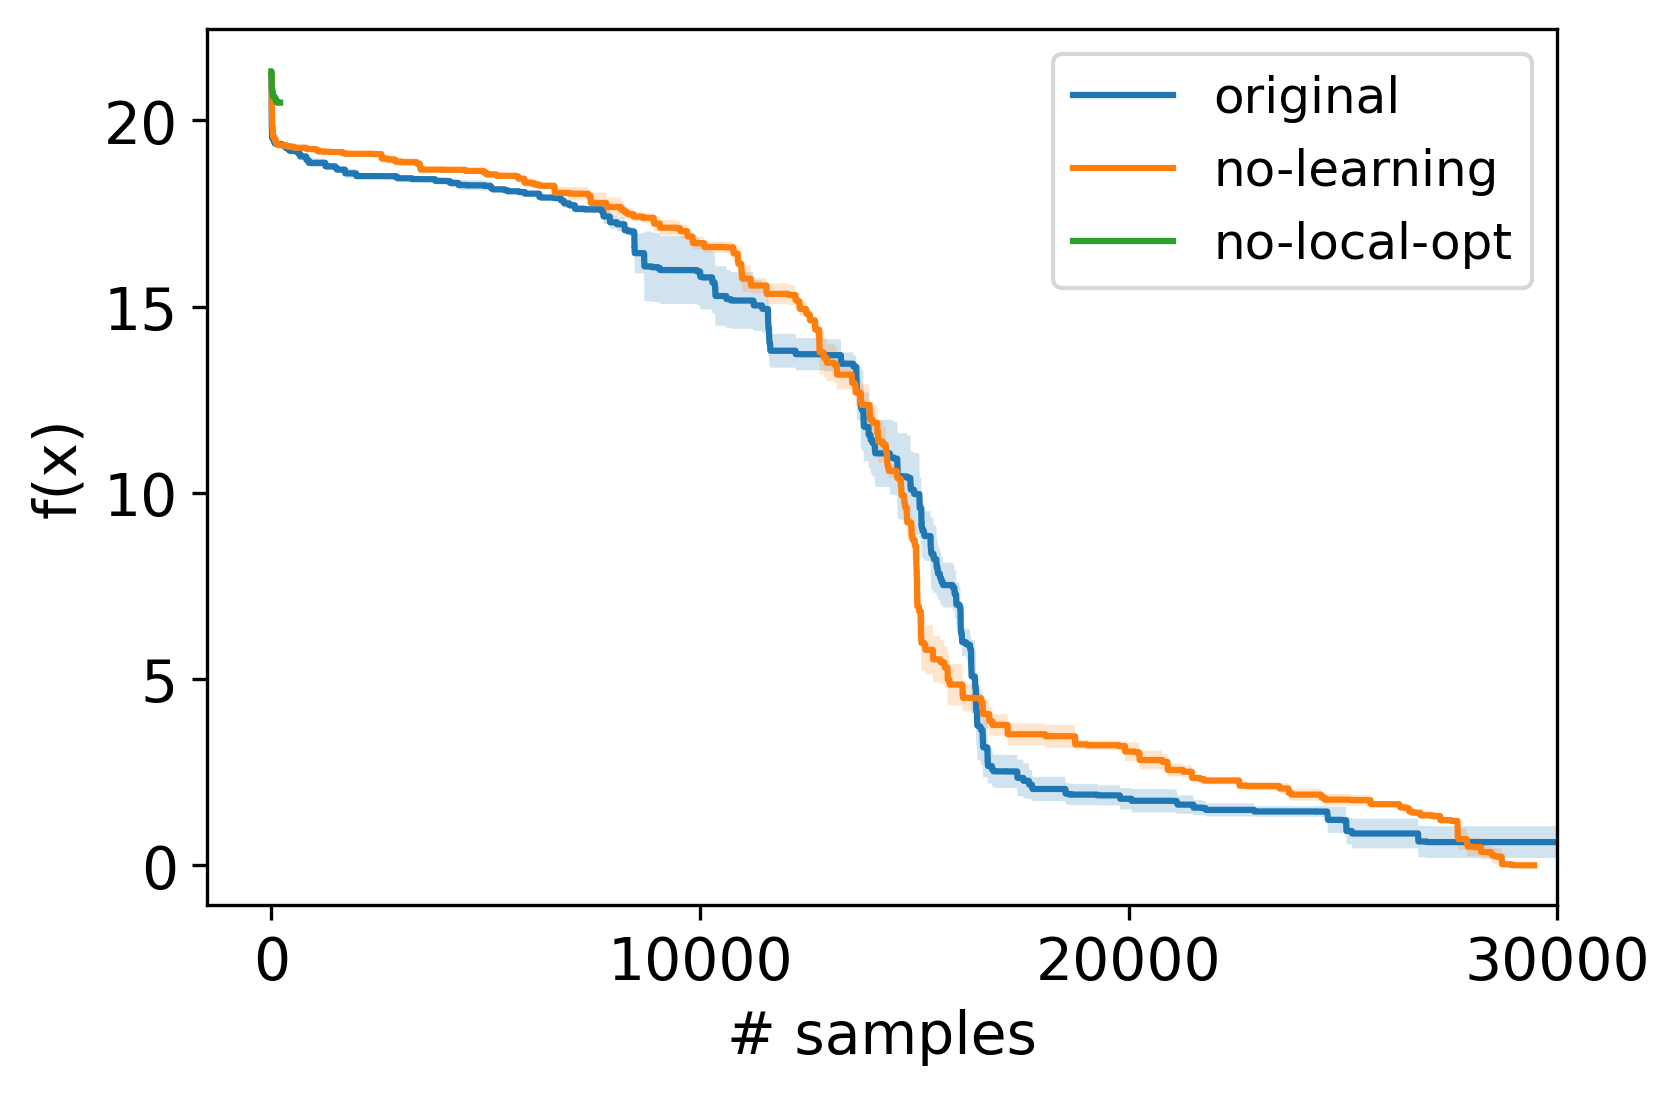

In [9]:
plot(stats_df, 'ackley', ['original', 'no-learning', 'no-local-opt'], 
     xlim=[None, 30000], ylim=[None, None], legend=True, save_dir="/projects/mcmm/figures/")

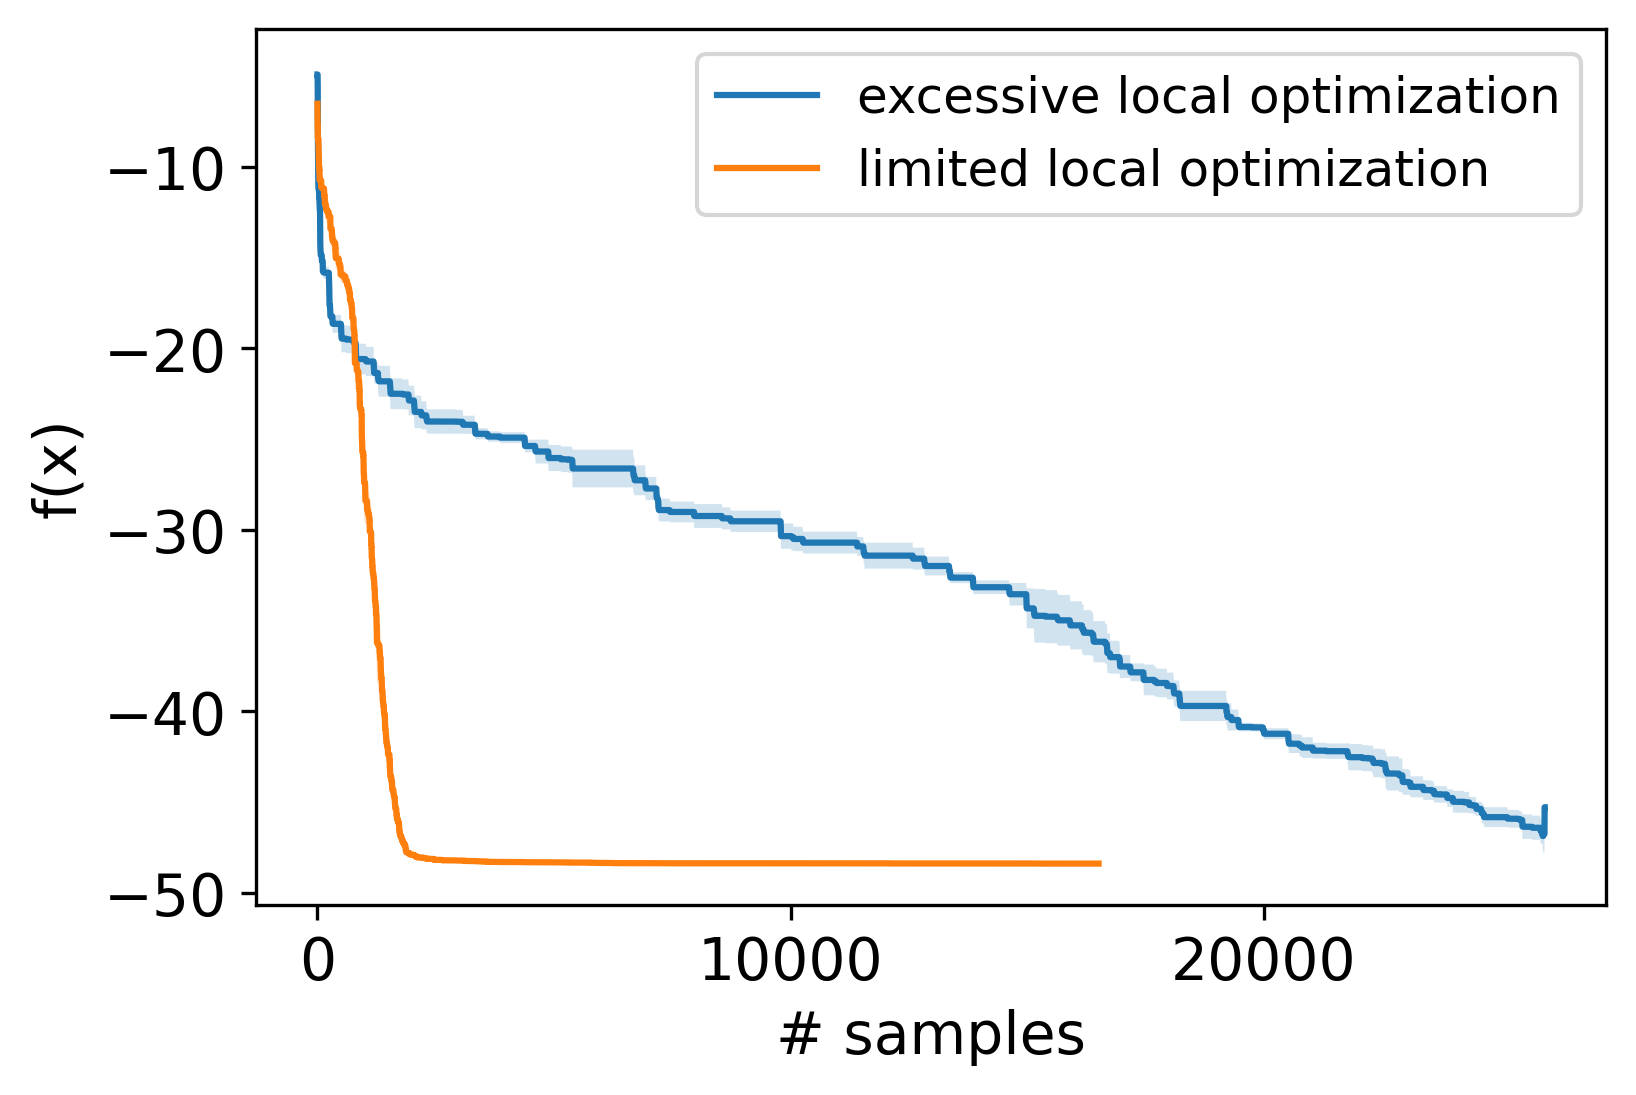

In [10]:
# plot(stats_df, 'michalewicz', ['original', 'no-learning', 'no-local-opt'], 
#      xlim=[None, None], ylim=[None, None], legend=True, save_dir="/projects/mcmm/figures/")

label_change_dict = {
    "original":    "excessive local optimization",
    "no-local-opt": "limited local optimization"
}
plot(stats_df, 'michalewicz', ['original', 'no-local-opt'], 
     xlim=[None, None], ylim=[None, None], legend=True, save_dir="/projects/mcmm/figures/",
    label_change_dict=label_change_dict)

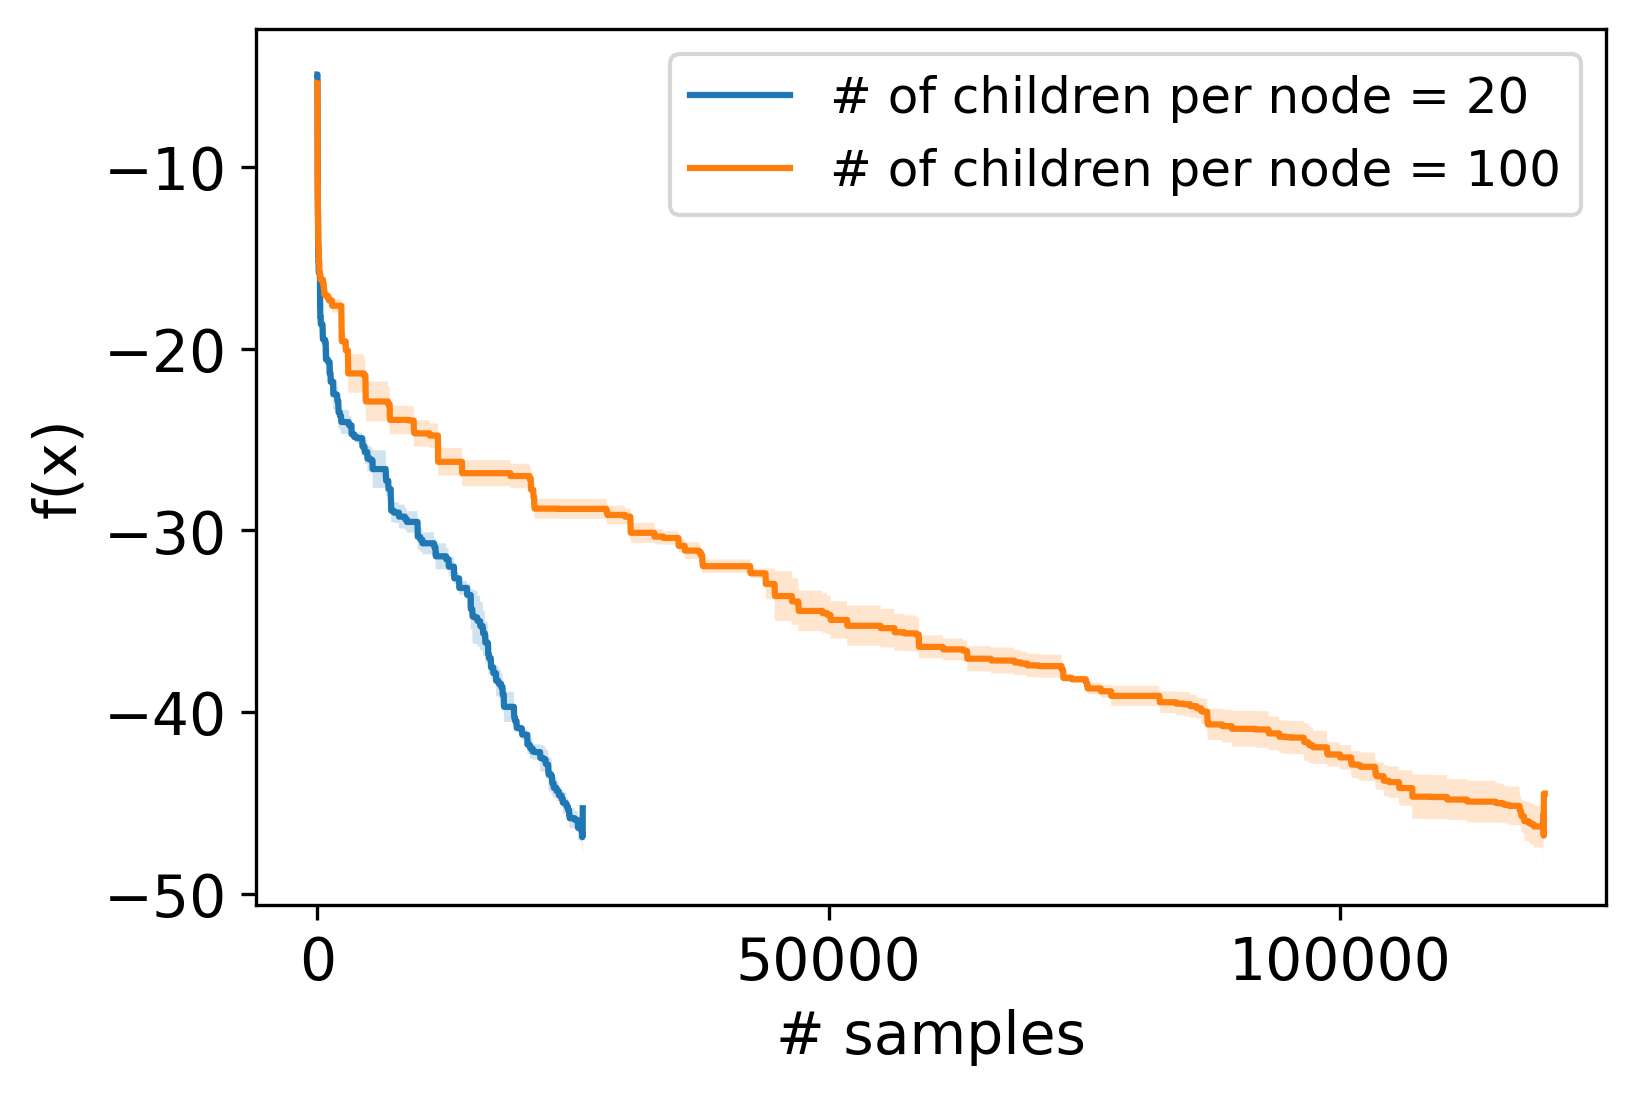

In [11]:
# plot(stats_df, 'michalewicz', ['original', 'nodeexplow', 'nodeexphigh'], 
#      xlim=[None, None], ylim=[None, None], legend=True, save_dir="/projects/mcmm/figures/")
label_change_dict = {
    "original":    r"# of children per node = 20",
    "nodeexphigh": r"# of children per node = 100"
}
plot(stats_df, 'michalewicz', ['original', 'nodeexphigh'], 
     xlim=[None, None], ylim=[None, None], legend=True, save_dir="/projects/mcmm/figures/", 
     label_change_dict=label_change_dict)

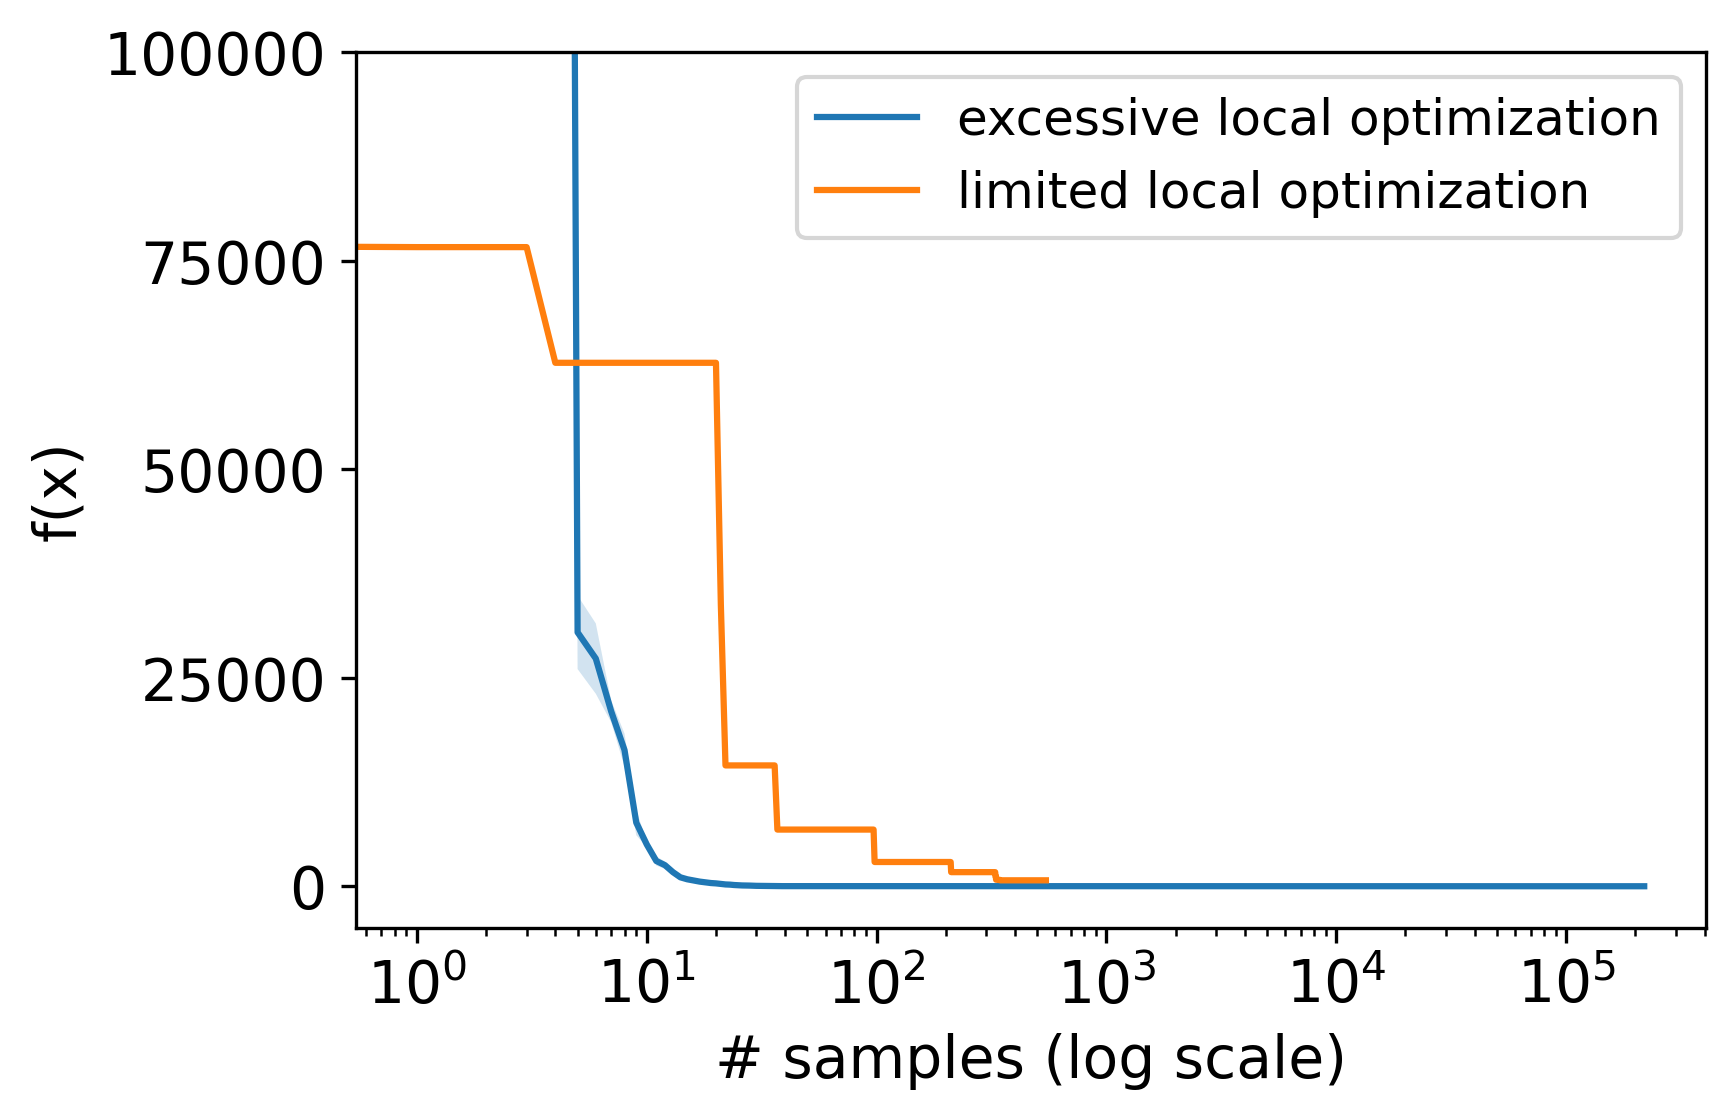

In [15]:
label_change_dict = {
    "original":    "excessive local optimization",
    "local-opt": "limited local optimization"
}
plot(stats_df, 'watson', ['original', 'local-opt'], 
     xlim=[None, None], ylim=[-5000, 100000], legend=True, log_x=True, save_dir="/projects/mcmm/figures/",
    label_change_dict = label_change_dict)